In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import math
import os.path

import keras
import sklearn

import pandas
import numpy
from matplotlib import pyplot as plt

from microesc import urbansound8k, preprocess, train, test


In [6]:
data = urbansound8k.load_dataset()
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
df = test.load_train_history('data/models')

Failed to load job sbcnn16k30-20190303-1949-a653-fold0: [Errno 2] File b'data/models/sbcnn16k30-20190303-1949-a653-fold0/train.csv' does not exist: b'data/models/sbcnn16k30-20190303-1949-a653-fold0/train.csv'
Failed to load job ldcnn20k60-20190306-0634-ce06-fold0: [Errno 2] File b'data/models/ldcnn20k60-20190306-0634-ce06-fold0/train.csv' does not exist: b'data/models/ldcnn20k60-20190306-0634-ce06-fold0/train.csv'
Failed to load job sbcnn16k30-20190302-1902-f03a-fold0: [Errno 2] File b'data/models/sbcnn16k30-20190302-1902-f03a-fold0/train.csv' does not exist: b'data/models/sbcnn16k30-20190302-1902-f03a-fold0/train.csv'
Failed to load job sbcnn16k32aug-20190301-0240-abbd-fold0: [Errno 2] File b'data/models/sbcnn16k32aug-20190301-0240-abbd-fold0/train.csv' does not exist: b'data/models/sbcnn16k32aug-20190301-0240-abbd-fold0/train.csv'
Failed to load job ldcnn20k60-20190306-0525-0767-fold0: [Errno 2] File b'data/models/ldcnn20k60-20190306-0525-0767-fold0/train.csv' does not exist: b'data/

Failed to load job sbcnn16k30-20190302-1828-e66d-fold0: [Errno 2] File b'data/models/sbcnn16k30-20190302-1828-e66d-fold0/train.csv' does not exist: b'data/models/sbcnn16k30-20190302-1828-e66d-fold0/train.csv'
Failed to load job ldcnn20k60-20190316-1420-3979-fold0: [Errno 2] File b'data/models/ldcnn20k60-20190316-1420-3979-fold0/train.csv' does not exist: b'data/models/ldcnn20k60-20190316-1420-3979-fold0/train.csv'
Failed to load job sbcnn.orig-2019-02-26-02-12-2c8ffebe-fold0: too many values to unpack (expected 5)
Failed to load job sbcnn16k30-20190302-2052-6d84-fold0: [Errno 2] File b'data/models/sbcnn16k30-20190302-2052-6d84-fold0/train.csv' does not exist: b'data/models/sbcnn16k30-20190302-2052-6d84-fold0/train.csv'
Failed to load job sbcnn16k32aug-20190301-0147-7fe7-fold0: [Errno 2] File b'data/models/sbcnn16k32aug-20190301-0147-7fe7-fold0/train.csv' does not exist: b'data/models/sbcnn16k32aug-20190301-0147-7fe7-fold0/train.csv'
Failed to load job sbcnn16k30-20190303-0152-ca0a-fold

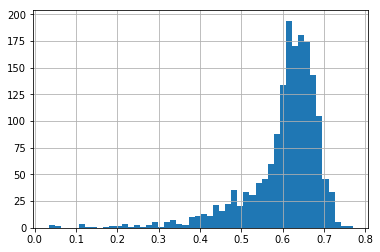

In [17]:
df.voted_val_acc.hist(bins=50)

In [19]:
df.sort_values('voted_val_acc', ascending=False)

,acc,epoch,fold,loss,model,run,template,top3,val_acc,val_loss,val_top3,voted_val_acc
39,0.674433,40,0,0.976088,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.685962,0.973320,NaN,0.769759
42,0.677767,43,0,0.963537,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.652885,1.047280,NaN,0.758305
13,0.427267,14,0,1.629935,data/models/ldcnn20k60-20190311-0423-302d-fold...,20190311-0423-302d,ldcnn20k60,NaN,0.668462,1.209446,NaN,0.751432
37,0.669867,38,0,0.986234,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.667500,0.985157,NaN,0.749141
48,0.690900,49,0,0.944461,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.663846,1.053781,NaN,0.730813
13,0.509067,14,0,1.318073,data/models/sbcnn44k128aug-20190303-2355-abd0-...,20190303-2355-abd0,sbcnn44k128aug,NaN,0.700200,1.175862,NaN,0.730813
13,0.403667,14,0,1.699590,data/models/ldcnn20k60-20190312-0012-49b7-fold...,20190312-0012-49b7,ldcnn20k60,NaN,0.656923,1.286173,NaN,0.728522
43,0.685533,44,0,0.963850,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.651346,1.057788,NaN,0.727377
9,0.382267,10,0,1.770334,data/models/ldcnn20k60-20190312-0012-49b7-fold...,20190312-0012-49b7,ldcnn20k60,NaN,0.638846,1.370502,NaN,0.727377
38,0.674867,39,0,0.982806,data/models/ldcnn20k60-20190316-0548-bfe2-fold...,20190316-0548-bfe2,ldcnn20k60,NaN,0.659038,1.045083,NaN,0.725086


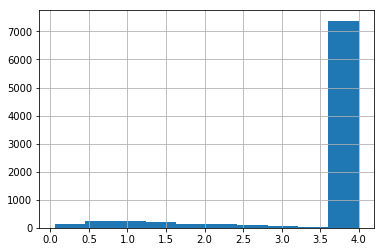

In [157]:
(data.end - data.start).hist()

In [158]:
(data.end-data.start).mode()

0    4.0
dtype: float64

In [159]:
folds, test = urbansound8k.folds(data)
len(folds), folds[0][0].shape, folds[0][1].shape, test.shape

(9, (7022, 8), (873, 8), (837, 8))

In [160]:
frame_samples=256
window_frames=72
fs=16000
w_ms = (frame_samples*window_frames/fs)
print('window size', w_ms)
w = list(train.sample_windows(int(4.0*fs), frame_samples=frame_samples, window_frames=window_frames))
print(w[-2][1] - w[-2][0], w[-1][1] - w[-1][0])
w

window size 1.152
17920.0 8704.0


[(0, 18432),
 (9216.0, 27648.0),
 (18432.0, 36864.0),
 (27648.0, 46080.0),
 (36864.0, 55296.0),
 (46080.0, 64000),
 (55296.0, 64000)]

In [204]:
sbcnn16k32_settings = dict(
    feature='mels',
    samplerate=16000,
    n_mels=32,
    fmin=0,
    fmax=8000,
    n_fft=512,
    hop_length=256,
    augmentations=5,
)

sbcnn44k128_settings = dict(
    feature='mels',
    samplerate=44100,
    n_mels=128,
    fmin=0,
    fmax=22050,
    n_fft=1024,
    hop_length=1024,
    augmentations=5,
)
window_frames = 128
settings = sbcnn44k128_settings

def load_sample(sample):
    return train.load_sample(sample, settings, window_frames=window_frames, feature_dir='../../scratch/aug')
    
load_sample(folds[0][0].iloc[5]).shape

(128, 128, 1)

In [169]:
gen = train.dataframe_generator

fold = folds[0][1]
import itertools
g = gen(fold[0:16], fold.classID[0:16], loader=load_sample, batchsize=8)
batches = list(itertools.islice(g, 16))
len(batches), batches[0][0].shape, batches[0][1].shape

(16, (8, 32, 72, 1), (8, 10))

In [170]:
import dense
import sbcnn
import dilated

def build_model():

    #model = dilated.build_model(bands=32, frames=72, channels=1, kernels=[32,32,32,32])
    model = sbcnn.build_model(bands=32, frames=72, channels=1, pool=(3,3))
    #model = dense.build_model(bands=32, frames=72, channels=1, pooling='avg',
    #                          dropout=0.5, growth=30, reduction=0.5)
    
    #model = dense.build_model(bands=32, frames=72, channels=1, pooling='avg',
    #                          dropout=0.5, growth=30, reduction=0.5)
    
    return model

build_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 72, 24)        240       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 10, 24, 24)        0         
_________________________________________________________________
activation_76 (Activation)   (None, 10, 24, 24)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 24, 48)        10416     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 3, 8, 48)          0         
_________________________________________________________________
activation_77 (Activation)   (None, 3, 8, 48)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 1, 6, 48)          20784     
__________

In [174]:
os.makedirs('test2')
h = train.train_model("test2", folds[0],
                      builder=build_model, loader=load_sample, val_loader=load_sample,
                      frame_samples=frame_samples, window_frames=window_frames,
                      epochs=1, train_samples=100, val_samples=100, batch_size=100)

Epoch 1/1
1/1 [==============================] - 5s 5s/step - loss: 10.3700 - acc: 0.1200 - val_loss: 4.3289 - val_acc: 0.1300

Epoch 00001: saving model to test2/e01-v4.33.t10.37.model.hdf5


In [175]:
train.history_dataframe(h)

,epoch,val_loss,val_acc,loss,acc
0,0,4.328907,0.13,10.370008,0.12


In [207]:
p = '../../jobs/sbcnn.orig-2019-02-26-02-12-2c8ffebe-fold7/e10-v13.78.model.hdf5'
model = keras.models.load_model(p)
model

fold
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

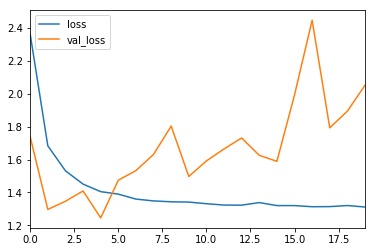

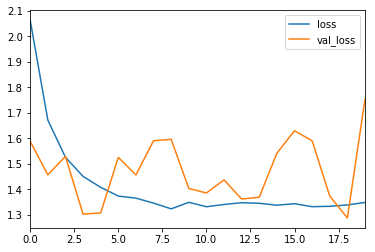

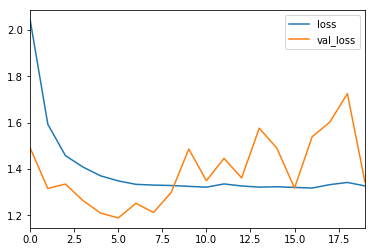

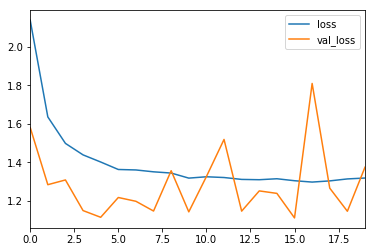

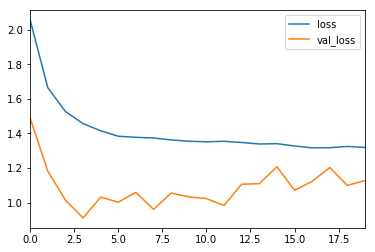

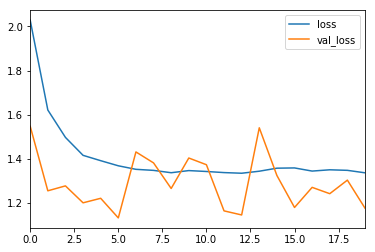

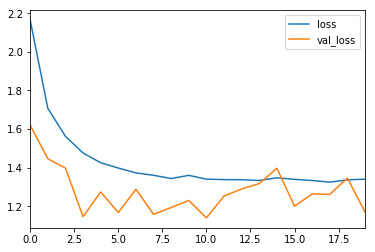

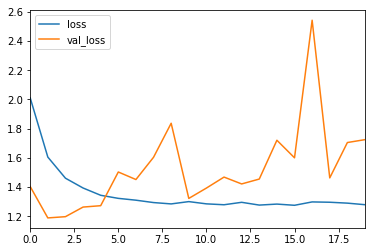

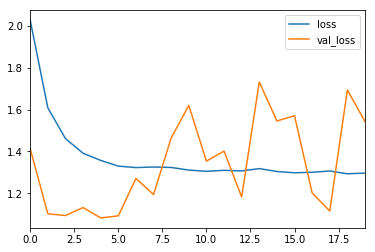

In [177]:
# jobs/sbcnn.orig-2019-02-26-13-56-26d5f8ac-fold8/history.csv



df.groupby('fold').plot(y=['loss', 'val_loss'])

fold
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

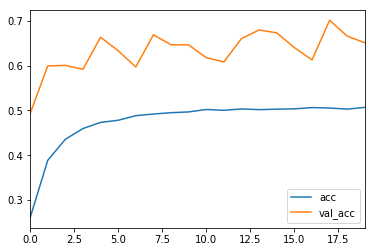

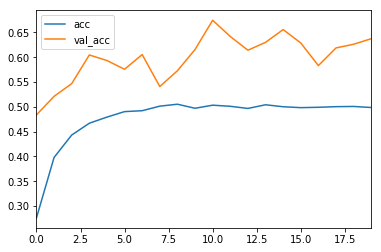

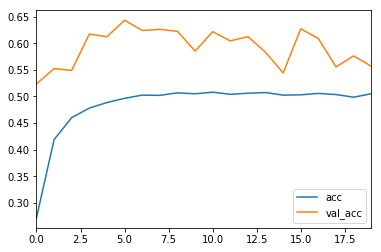

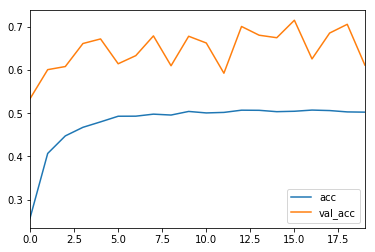

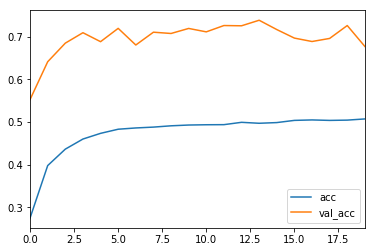

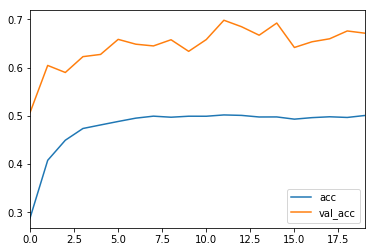

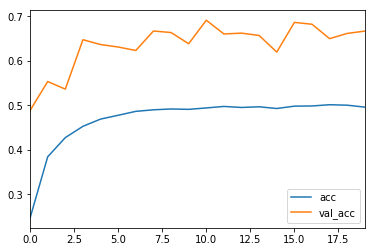

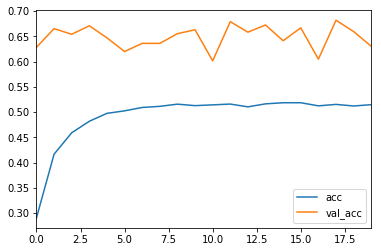

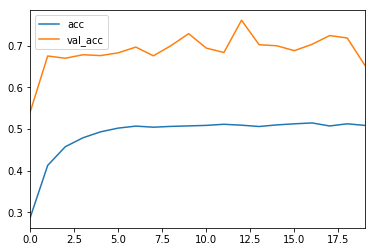

In [178]:
df.groupby('fold').plot(y=['acc', 'val_acc'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac5d0db128>],
      dtype=object)

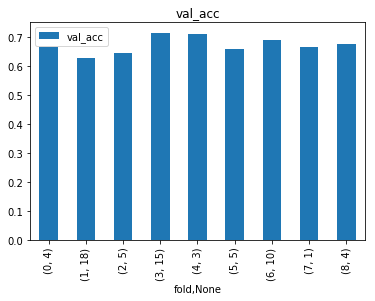

In [179]:
best_by_loss = df.groupby('fold').apply(lambda d: d.sort_values('val_loss', ascending=True).head(1))
best_by_loss.plot(y='val_acc', kind='bar', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac5d05e4a8>],
      dtype=object)

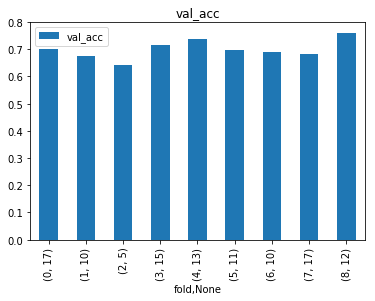

In [180]:
best_by_acc = df.groupby('fold').apply(lambda d: d.sort_values('val_acc', ascending=False).head(1))
best_by_acc.plot(y='val_acc', kind='bar', subplots=True)

In [181]:
# Takes 30 seconds+
models = best_by_loss['model'].apply(lambda p: keras.models.load_model(p))


In [221]:
def score(model, data):
    predictions = predict_windowed(settings, model, data, method='majority', overlap=0.1)
    s = accuracy_score(data.classID, predictions)
    print('acc', s)
    return s

In [192]:
sbcnn44k128 = scores

In [222]:
scores = [ score(m, test) for m in models ]

acc 0.6857825567502986
acc 0.7060931899641577
acc 0.6152927120669056
acc 0.7371565113500598
acc 0.7108721624850657
acc 0.6786140979689367
acc 0.7132616487455197
acc 0.6200716845878136
acc 0.7216248506571087


In [200]:
val_scores = [ score(m, folds[i][1]) for i, m in enumerate(models) ]
numpy.mean(val_scores)

acc 0.722794959908362
acc 0.6565315315315315
acc 0.6810810810810811
acc 0.7575757575757576
acc 0.7435897435897436
acc 0.6816524908869988
acc 0.7494033412887828
acc 0.6687344913151365
acc 0.7365196078431373


0.7108758894467256

In [224]:
sbcnn44k128

[0.6810035842293907,
 0.7084826762246117,
 0.6188769414575866,
 0.7323775388291517,
 0.7168458781362007,
 0.6821983273596177,
 0.7108721624850657,
 0.6140979689366786,
 0.7192353643966547]

In [ ]:
# TODO: calculate per-class accuracy. For each fold
# TODO: compare single-frame accuracy (from training) versus voted accuracy
# TODO: compare no-overlap, 50% overlap and 10% overlap

In [151]:
folds[8][1].shape

(816, 8)

In [187]:
df = pandas.DataFrame({'test_acc': sbcnn16k32 })
df.to_csv('../sbcnn16k32.results.csv')

(0.6, 0.85)

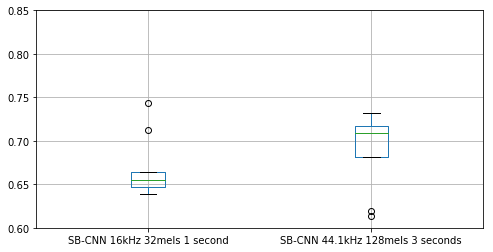

In [199]:
df = pandas.DataFrame({
    'SB-CNN 16kHz 32mels 1 second': sbcnn16k32,
    'SB-CNN 44.1kHz 128mels 3 seconds': sbcnn44k128,
})
df.to_csv('results.csv')
ax = df.boxplot(figsize=(8,4))
ax.set_ylim((0.6, 0.85))

In [223]:
numpy.mean(scores), numpy.median(scores)

(0.6876410460639851, 0.7060931899641577)

In [225]:
sbcnn16k32

[0.6547192353643967,
 0.6391875746714456,
 0.6463560334528077,
 0.6571087216248507,
 0.6642771804062126,
 0.7431302270011948,
 0.6511350059737157,
 0.7120669056152927,
 0.6403823178016727]

In [226]:
numpy.mean(sbcnn16k32)

0.6675959113235099